# Exemples for image3d toolbox

This exemple shows the minimum things to do to autocorrelate a 3D image

## Toolbox needed

In [1]:
import image3d.image3d as image3d
import image3d.xcorr3d as xcorr3d
import image3d.load_data as load_data

## Create a 3d black and white image (0 or 1) to build a 3d object

It can be read from tiff file using the function load_data.load_image_from_tiff


0 background and 1 ellipsoidale

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt

size=100 #number of voxel size³
center=size/2

ax=size*0.25
ay=size*0.05
az=size*0.10

im=np.zeros([size,size,size])

for i in np.linspace(center-int(ax),center+int(ax),2*int(ax)+1):
    for j in np.linspace(center-int(ay),center+int(ay),2*int(ay)+1):
        for k in np.linspace(center-int(az),center+int(az),2*int(az)+1):
            if ((i-center)**2/(ax**2)+(j-center)**2/(ay**2)+(k-center)**2/(az**2))<1:
                im[int(i),int(j),int(k)]=1


## Build the image3d object

In [3]:
res=1 # resolution of the image, size of the Voxel
data=image3d.image3d(im,res)

## Plot one slice of the image

Text(0.5, 1.0, 'Image, X section, middle')

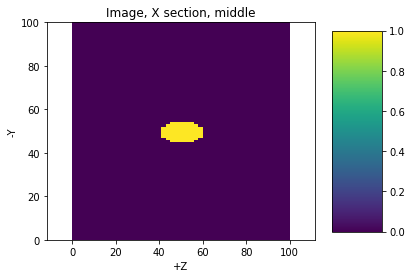

In [4]:
plt.figure()
data.plot('X',0.5)
plt.title('Image, X section, middle')

Text(0.5, 1.0, 'Image, Y section, middle')

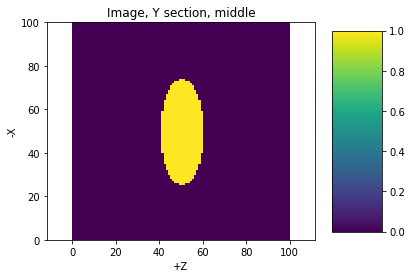

In [5]:
plt.figure()
data.plot('Y',0.5)
plt.title('Image, Y section, middle')

Text(0.5, 1.0, 'Image, Z section, middle')

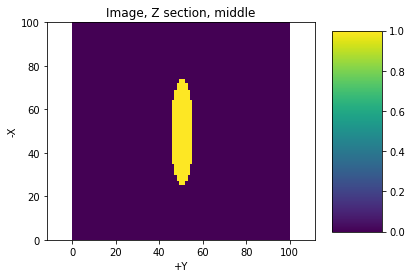

In [6]:
plt.figure()
data.plot('Z',0.5)
plt.title('Image, Z section, middle')

## Compute the autcorrelation function

In [7]:
print ('Begining autocorrelation', time.asctime())
autocorr=data.xcorr3d()
print ('End autocorrelation', time.asctime())

Begining autocorrelation Thu Feb 28 15:35:43 2019
End autocorrelation Thu Feb 28 15:35:43 2019


## Plot one slice of autocorrelation function

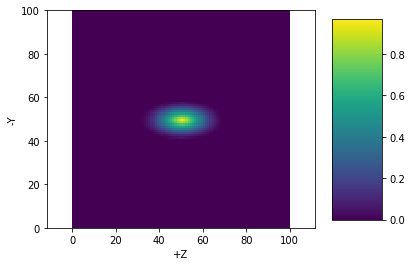

In [8]:
autocorr.plot('X',0.5)

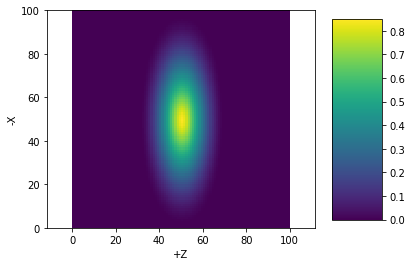

In [9]:
autocorr.plot('Y',0.5)

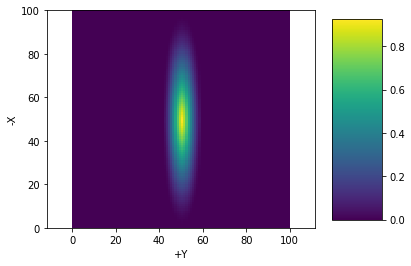

In [10]:
autocorr.plot('Z',0.5)

## Extract Correlation radius for every direction
### Correlation length Ax=Cinf
Plot it in a pole figure

Begining stereo proj Thu Feb 28 15:35:44 2019
End stereo proj Thu Feb 28 15:35:52 2019


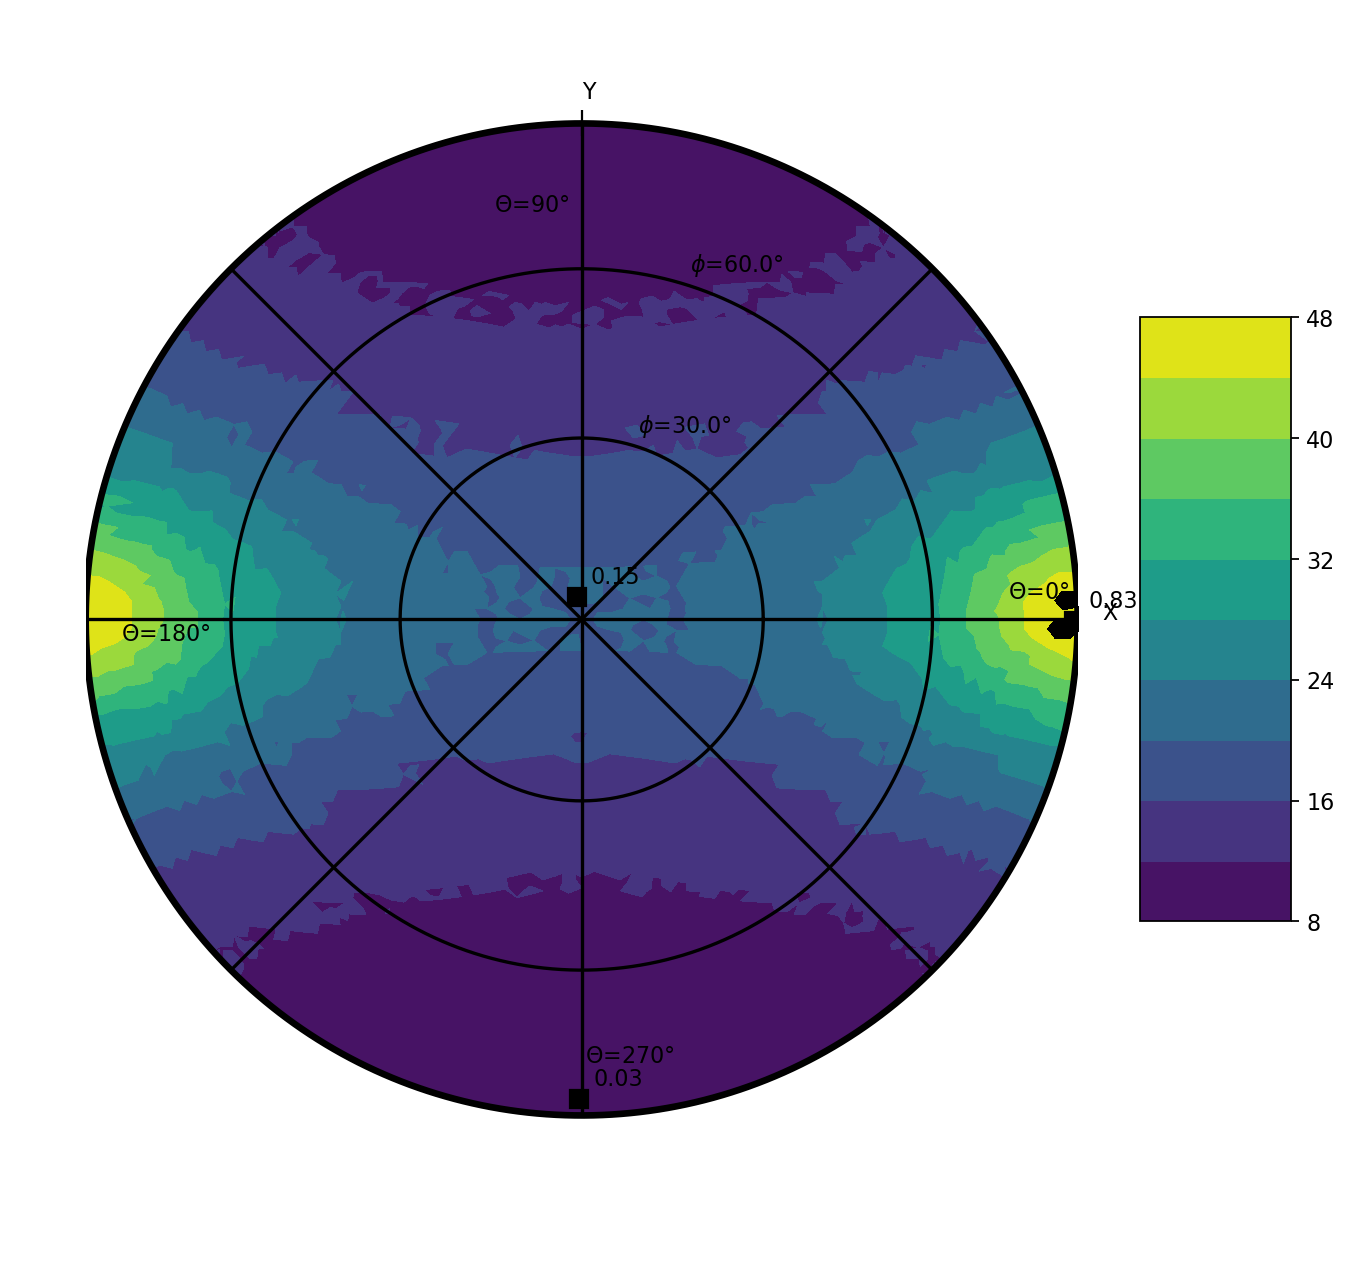

In [11]:
print ('Begining stereo proj', time.asctime())
[eigvalue,eigvector,radiusmean,radiusstd,xmin,rmax]=autocorr.stereographic_corr_length(coeffCinf=np.array([1.]),pc=15)
print ('End stereo proj', time.asctime())

In [12]:
print('Ellipse 1/2 length :')
print('x', ax,' pixels')
print('y', ay,' pixels')
print('z', az,' pixels')

Ellipse 1/2 length :
x 25.0  pixels
y 5.0  pixels
z 10.0  pixels


### Correlation length: P

Begining stereo proj Thu Feb 28 15:35:53 2019
End stereo proj Thu Feb 28 15:36:01 2019


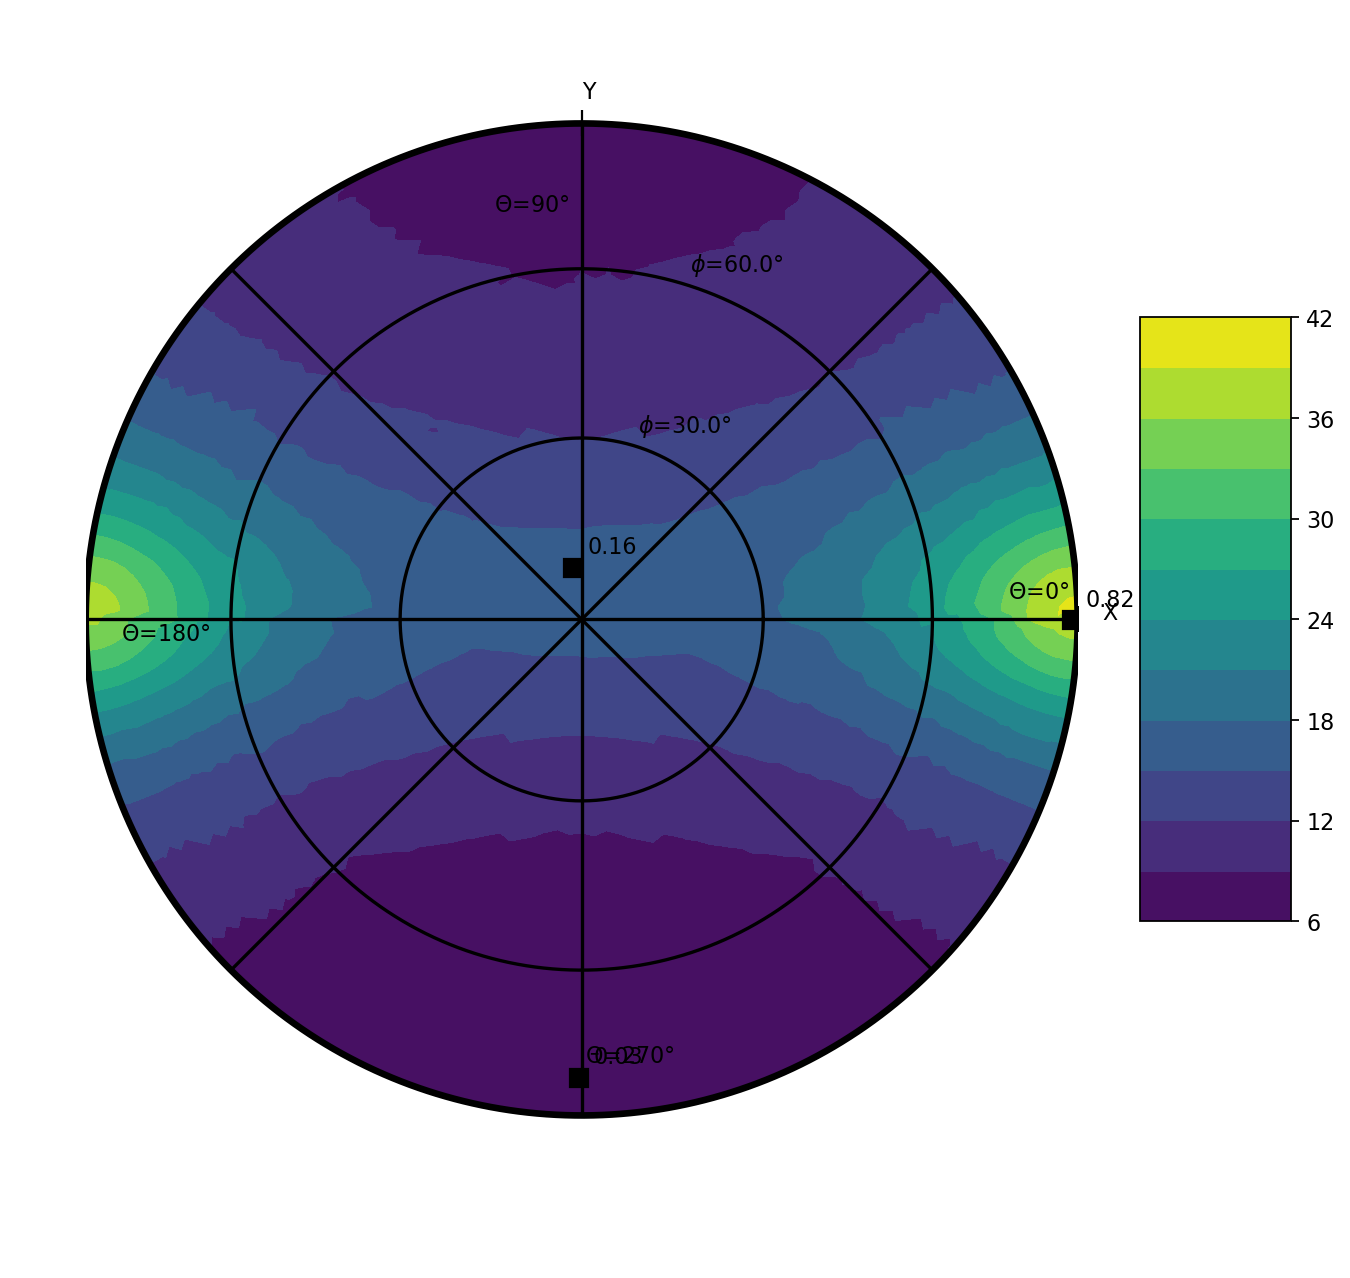

In [13]:
print ('Begining stereo proj', time.asctime())
[eigvalue,eigvector,radiusmean,radiusstd,xmin,rmax]=autocorr.stereographic_corr_length(coeffCinf=np.array([1.]),pc=15,usePI=True)
print ('End stereo proj', time.asctime())

## Other image

In [38]:
size=100 #number of voxel size³
center=size/2

im=np.zeros([size,size,size])
#im[int(center-1):int(center+1),:,:]=1
#im[int(center-1):int(center+1),int(7.*size/16.):int(9.*size/16.),int(7.*size/16.):int(9.*size/16.)]=1
im[int(center-1):int(center+1),int(7.*size/16.):int(9.*size/16.),int(7.*size/16.)-20:int(9.*size/16.)-20]=1
im[int(center-1):int(center+1),int(7.*size/16.):int(9.*size/16.),int(7.*size/16.)+20:int(9.*size/16.)+20]=1

res=1 # resolution of the image, size of the Voxel
data=image3d.image3d(im,res)

Text(0.5, 1.0, 'Image, Y section, middle')

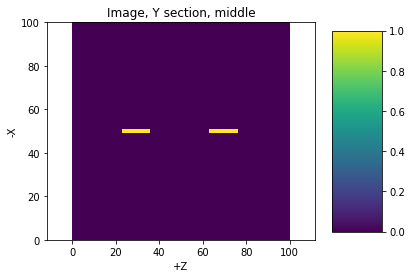

In [39]:
plt.figure()
data.plot('Y',0.5)
plt.title('Image, Y section, middle')

Text(0.5, 1.0, 'Image, X section, middle')

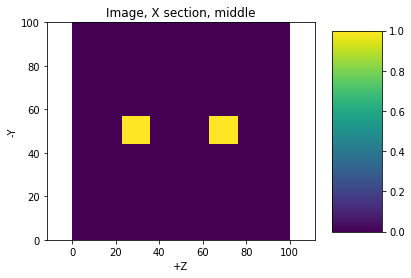

In [40]:
plt.figure()
data.plot('X',0.5)
plt.title('Image, X section, middle')

Text(0.5, 1.0, 'Image, Z section, middle')

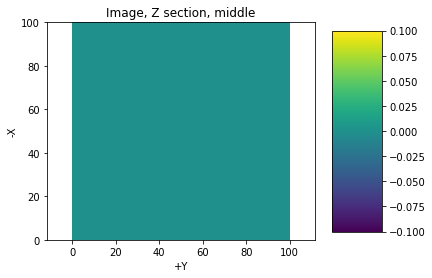

In [41]:
plt.figure()
data.plot('Z',0.5)
plt.title('Image, Z section, middle')

In [42]:
print ('Begining autocorrelation', time.asctime())
autocorr=data.xcorr3d()
print ('End autocorrelation', time.asctime())

Begining autocorrelation Thu Feb 28 15:38:21 2019
End autocorrelation Thu Feb 28 15:38:21 2019


Begining stereo proj Thu Feb 28 15:38:21 2019
End stereo proj Thu Feb 28 15:38:29 2019


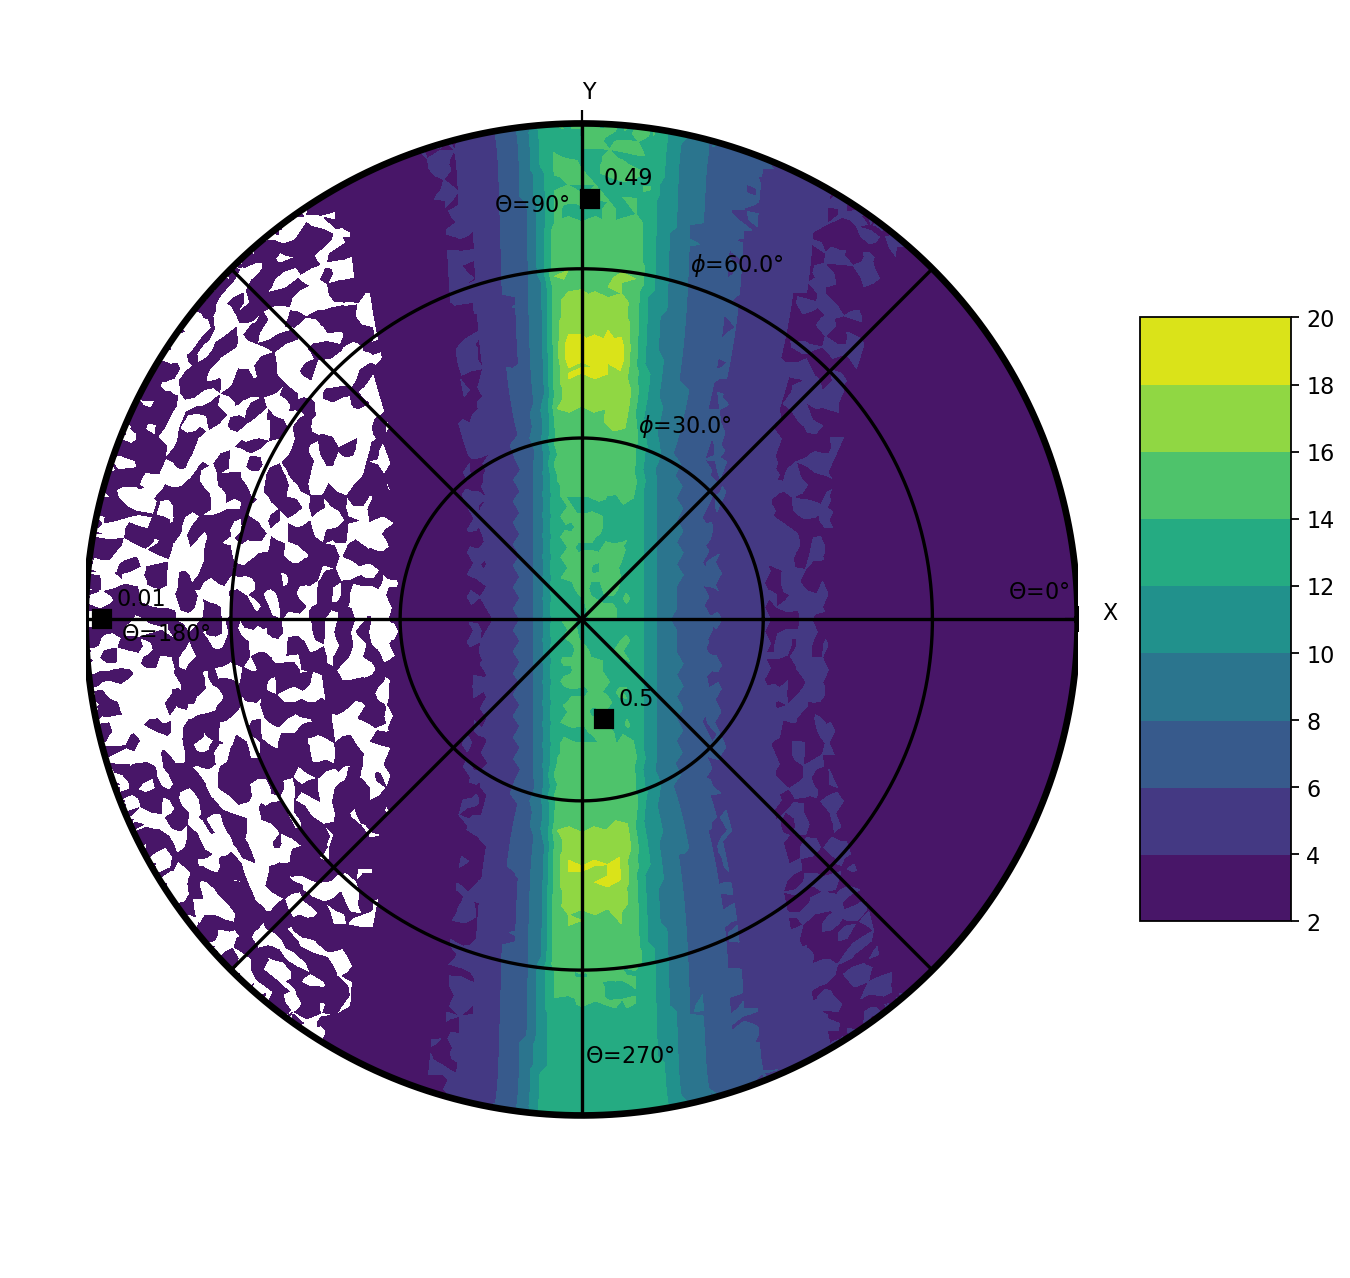

In [43]:
print ('Begining stereo proj', time.asctime())
[eigvalue,eigvector,radiusmean,radiusstd,xmin,rmax]=autocorr.stereographic_corr_length(coeffCinf=np.array([1.]),pc=15)
print ('End stereo proj', time.asctime())

Begining stereo proj Thu Feb 28 15:38:30 2019
End stereo proj Thu Feb 28 15:38:38 2019


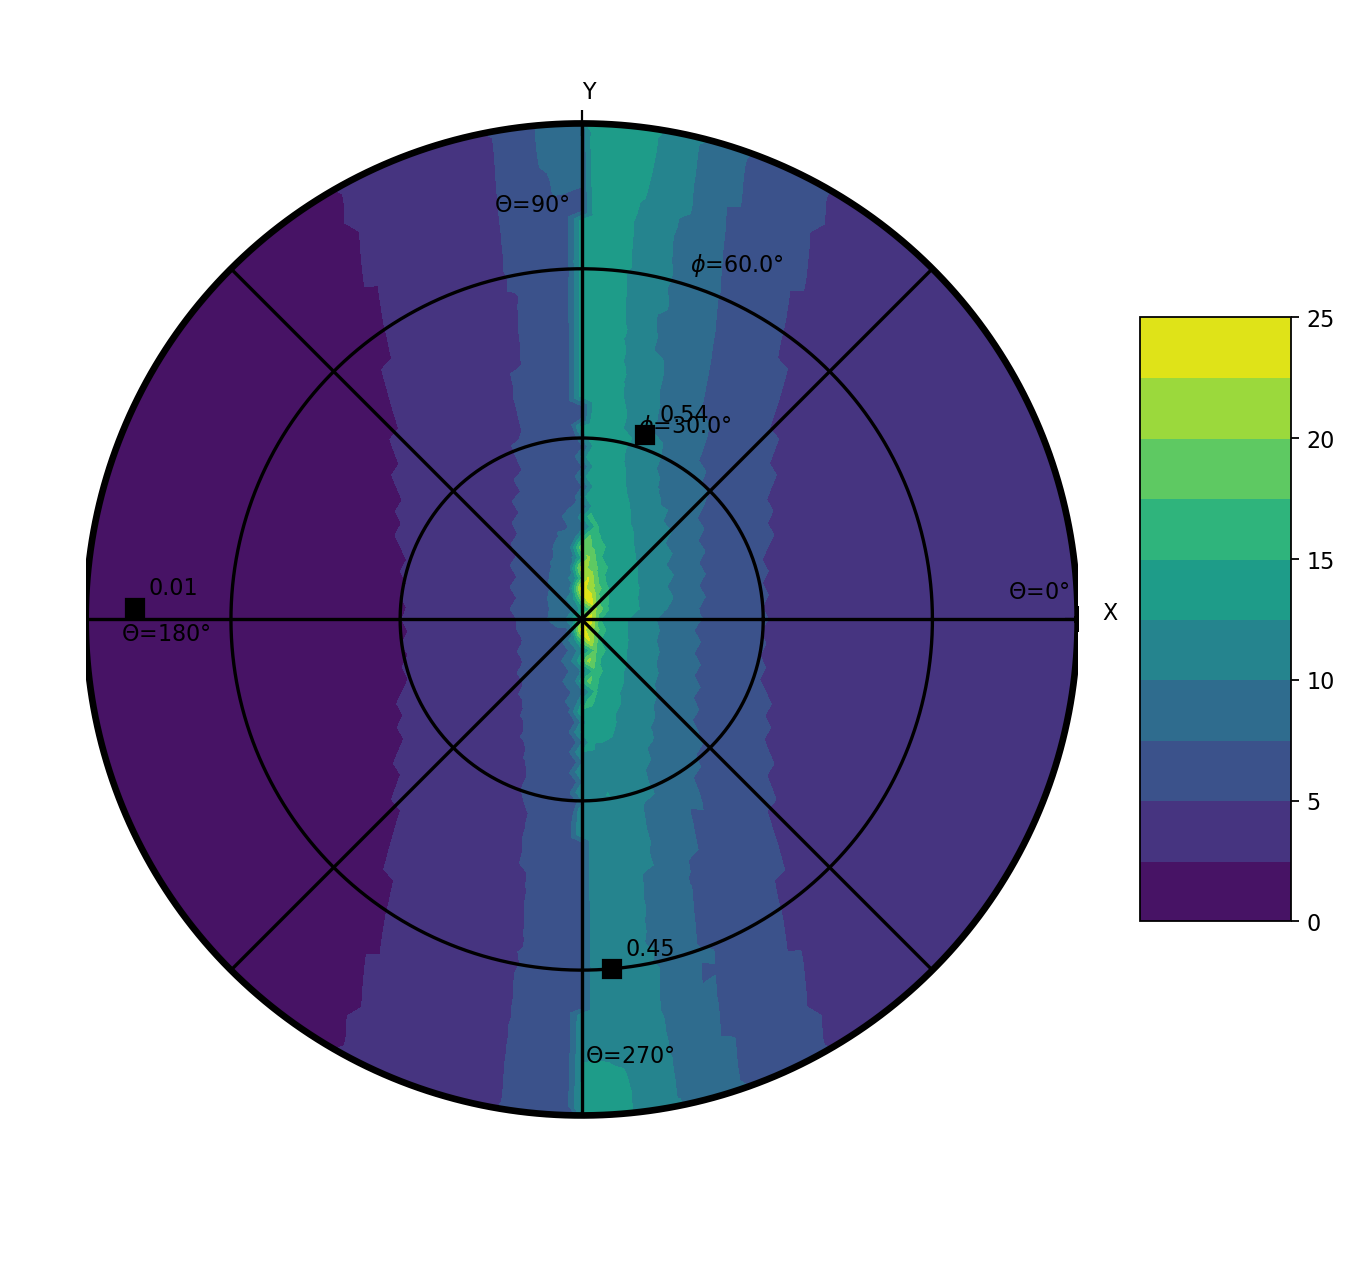

In [44]:
print ('Begining stereo proj', time.asctime())
[eigvalue,eigvector,radiusmean,radiusstd,xmin,rmax]=autocorr.stereographic_corr_length(coeffCinf=np.array([1.]),pc=15,usePI=True)
print ('End stereo proj', time.asctime())

In [45]:
coor,vc,val=autocorr.local_maxima()

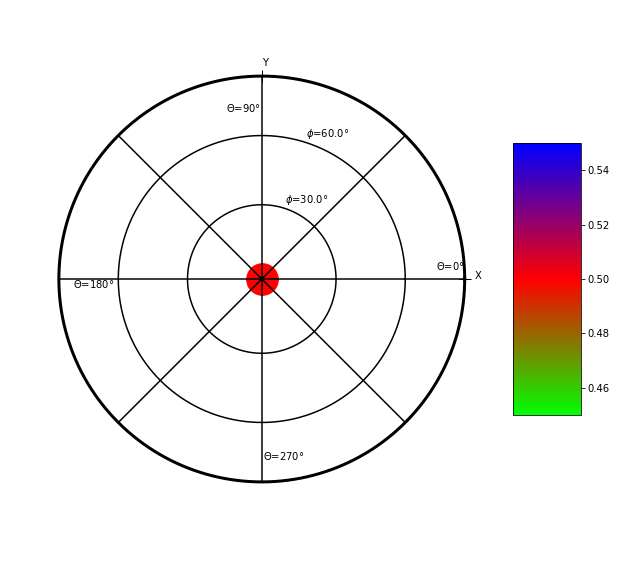

In [46]:
import matplotlib.cm as cm
plt.figure(figsize=(10,10))
vc.plot_vector(val,size=1000,cm=cm.brg_r)

In [47]:
id=np.where(val==val.max())[0]

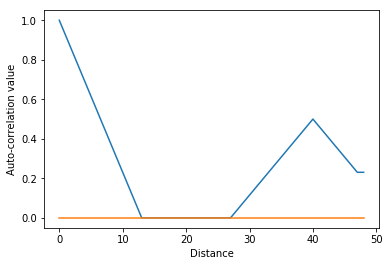

In [48]:
autocorr.correlation_profil(-vc.vector[id[0]])

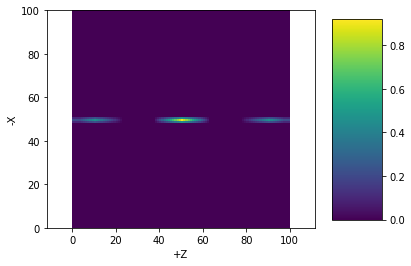

In [51]:
autocorr.plot('Y',0.5)